In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The statistical module used to run chi square test
import scipy.stats as stats

import gmaps

# Google developer API key
from configMP import gkey

# Configure gmaps
gmaps.configure(api_key=gkey)

In [2]:
# Read File and store into Pandas data frame
austin_data = pd.read_csv("Crime_Data/Austin_Crime_Data.csv")
austin_data.head()

,Date,Latitude,Longitude
0,9/14/17,30.333542,-97.705762
1,10/11/14,30.268006,-97.738955
2,2/11/15,30.261677,-97.718775
3,10/1/18,30.398291,-97.744022
4,11/23/03,30.264357,-97.736801


In [3]:
austin_data["Date"] = austin_data["Date"].astype('datetime64')

In [4]:
austin_data.head()

,Date,Latitude,Longitude
0,2017-09-14,30.333542,-97.705762
1,2014-10-11,30.268006,-97.738955
2,2015-02-11,30.261677,-97.718775
3,2018-10-01,30.398291,-97.744022
4,2003-11-23,30.264357,-97.736801


In [5]:
austin_data.dtypes

Date         datetime64[ns]
Latitude            float64
Longitude           float64
dtype: object

In [6]:
austin_sorted = austin_data.sort_values(by=["Date"])
austin_sorted = austin_sorted.reset_index(drop=True)
austin_sorted.head()

,Date,Latitude,Longitude
0,2003-01-01,30.372128,-97.700873
1,2003-01-01,30.233763,-97.722239
2,2003-01-01,NaN,NaN
3,2003-01-01,30.229574,-97.774432
4,2003-01-01,30.229435,-97.722033


In [7]:
austin_2018a = austin_sorted.loc[austin_sorted["Date"] >= "2018-01-01", :]
austin_2018a.head()

,Date,Latitude,Longitude
980084,2018-01-01,30.407848,-97.678228
980085,2018-01-01,30.269227,-97.752997
980086,2018-01-01,30.260003,-97.739408
980087,2018-01-01,30.266252,-97.749883
980088,2018-01-01,30.292445,-97.696473


In [8]:
austin_2018 = austin_2018a.loc[austin_2018a["Date"] <= "2018-12-31", :]
austin_2018.head()

,Date,Latitude,Longitude
980084,2018-01-01,30.407848,-97.678228
980085,2018-01-01,30.269227,-97.752997
980086,2018-01-01,30.260003,-97.739408
980087,2018-01-01,30.266252,-97.749883
980088,2018-01-01,30.292445,-97.696473


In [9]:
austin_2018 = austin_2018.reset_index(drop=True)

In [10]:
len(austin_2018)

48442

In [11]:
austin_2018_w = len(austin_2018.loc[((austin_2018["Date"] >= "2018-01-01") &
                               (austin_2018["Date"] <= "2018-03-20")) |
                               (austin_2018["Date"] >= "2018-12-21")])

austin_2018_s = len(austin_2018.loc[((austin_2018["Date"] >= "2018-03-21") &
                               (austin_2018["Date"] <= "2018-06-20"))])
                    
austin_2018_ss = len(austin_2018.loc[((austin_2018["Date"] >= "2018-06-20") &
                               (austin_2018["Date"] <= "2018-09-21"))])

austin_2018_f = len(austin_2018.loc[((austin_2018["Date"] >= "2018-09-22") &
                               (austin_2018["Date"] <= "2018-12-20"))])

In [12]:
print(f"Winter: {austin_2018_w}")
print(f"Spring: {austin_2018_s}")
print(f"Summer: {austin_2018_ss}")
print(f"Fall: {austin_2018_f}")

Winter: 10798
Spring: 10109
Summer: 9324
Fall: 18307


In [13]:
# DATASET 3
seasons = ["Winter", "Spring", "Summer", "Fall"]
crime = [austin_2018_w, austin_2018_s, austin_2018_ss, austin_2018_f]
colors = ["lightgreen", "red", "yellow", "lightskyblue"]
explode = (0, 0, 0, .05)

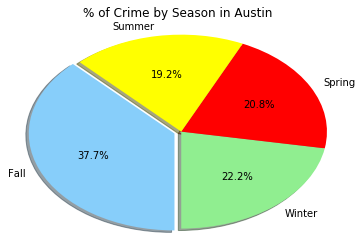

In [14]:
plt.title("% of Crime by Season in Austin")
plt.pie(crime, explode=explode, labels=seasons, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=270)
plt.axis("auto")

# Save the figure
plt.savefig("Pictures/%CrimeBySeasonAustin.png")

plt.show()

In [15]:
austin_2018.head()

,Date,Latitude,Longitude
0,2018-01-01,30.407848,-97.678228
1,2018-01-01,30.269227,-97.752997
2,2018-01-01,30.260003,-97.739408
3,2018-01-01,30.266252,-97.749883
4,2018-01-01,30.292445,-97.696473


In [16]:
austin_2018["Month"] = austin_2018["Date"].dt.month

In [17]:
austin_2018.sample(10)

,Date,Latitude,Longitude,Month
36853,2018-11-19,30.318982,-97.690415,11
39804,2018-11-30,NaN,NaN,11
6603,2018-03-06,30.374567,-97.730775,3
37472,2018-11-21,30.189546,-97.741217,11
22345,2018-07-29,30.192997,-97.765057,7
20317,2018-07-10,30.267553,-97.734674,7
43242,2018-12-12,30.293144,-97.745873,12
28270,2018-09-29,30.187826,-97.761316,9
34599,2018-11-08,30.221730,-97.733035,11
40941,2018-12-03,30.457708,-97.788266,12


In [18]:
attempt = austin_2018.groupby(austin_2018["Date"].dt.dayofyear)

In [19]:
attempt.head()

,Date,Latitude,Longitude,Month
0,2018-01-01,30.407848,-97.678228,1
1,2018-01-01,30.269227,-97.752997,1
2,2018-01-01,30.260003,-97.739408,1
3,2018-01-01,30.266252,-97.749883,1
4,2018-01-01,30.292445,-97.696473,1
121,2018-01-02,30.307651,-97.735350,1
122,2018-01-02,30.216829,-97.796978,1
123,2018-01-02,30.318529,-97.703422,1
124,2018-01-02,30.366117,-97.727721,1
125,2018-01-02,30.269733,-97.736929,1


In [20]:
attempt["Date"].count()

Date
1      121
2       81
3       88
4      100
5      106
6      100
7      105
8       91
9      102
10      94
11      91
12      96
13      91
14      79
15      99
16      76
17      93
18      90
19     116
20     104
21     104
22      92
23      95
24      90
25     113
26     128
27      94
28     103
29      89
30      88
      ... 
336    293
337    282
338    267
339    280
340    270
341    292
342    280
343    265
344    269
345    287
346    292
347    261
348    294
349    284
350    281
351    284
352    292
353    276
354    263
355    311
356    277
357    210
358    223
359    228
360    207
361    261
362    271
363    224
364    211
365    260
Name: Date, Length: 365, dtype: int64

In [21]:
year_series = pd.Series(range(0,366))

In [22]:
austin_plot_data = pd.DataFrame({"Day of the Year" : year_series, "Crime Count" : attempt["Date"].count()})
austin_plot_data.head()

,Day of the Year,Crime Count
0,0,NaN
1,1,121.0
2,2,81.0
3,3,88.0
4,4,100.0


In [23]:
austin_fixed = austin_plot_data.dropna(how='any')
austin_fixed.head()

,Day of the Year,Crime Count
1,1,121.0
2,2,81.0
3,3,88.0
4,4,100.0
5,5,106.0


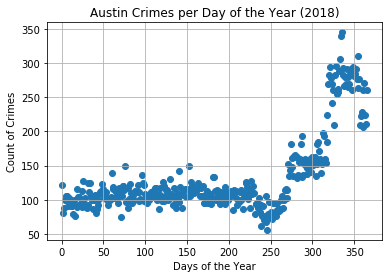

In [46]:
# Build a scatter plot for each data type
plt.scatter(austin_fixed["Day of the Year"], austin_fixed["Crime Count"], marker="o")

# Incorporate the other graph properties
plt.title("Austin Crimes per Day of the Year (2018)")
plt.ylabel("Count of Crimes")
plt.xlabel("Days of the Year")
plt.grid(True)

# Save the figure
plt.savefig("Pictures/AustinCrimesperDayofYear2018Scatter.png")

# Show plot
plt.show()

In [25]:
weather = pd.read_csv("Weather_Data/Weather.csv")
weather.head()

,City,Month,High_avg,Low_avg
0,Chicago,January,32,21
1,Chicago,February,36,26
2,Chicago,March,45,34
3,Chicago,April,56,43
4,Chicago,May,66,53


In [26]:
austin_weather = weather.loc[weather["City"] == "Austin", :]
austin_weather.head()

,City,Month,High_avg,Low_avg
24,Austin,January,61,40
25,Austin,February,65,44
26,Austin,March,73,51
27,Austin,April,80,58
28,Austin,May,86,66


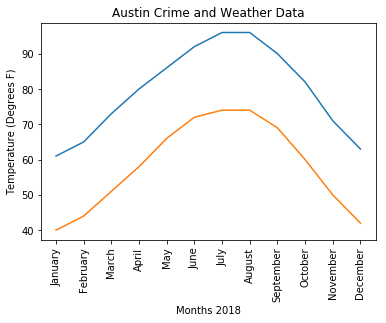

In [45]:
# Plot both on the same chart
plt.plot(austin_weather["Month"], austin_weather["High_avg"])
plt.plot(austin_weather["Month"], austin_weather["Low_avg"])

plt.xticks(austin_weather["Month"], austin_weather["Month"], rotation='vertical')
plt.ylabel("Temperature (Degrees F)")
plt.xlabel("Months 2018")
plt.title("Austin Crime and Weather Data")

# Save the figure
plt.savefig("Pictures/AustinWeather.png")

plt.show()

In [28]:
chi_test = pd.DataFrame({"Season": ["Winter", "Spring", "Summer", "Fall"], 
                     "Observed" : [austin_2018_w, austin_2018_s, austin_2018_ss, austin_2018_f],
                     "Expected": [12134.5, 12134.5, 12134.5, 12134.5]})

In [29]:
chi_test.head()

,Season,Observed,Expected
0,Winter,10798,12134.5
1,Spring,10109,12134.5
2,Summer,9324,12134.5
3,Fall,18307,12134.5


In [30]:
# Calculate the critical value
# The degree of freedom is 3-1 = 2
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 3)

In [31]:
# Print the critical value
critical_value

7.814727903251179

In [32]:
# Run the chi square test with stats.chisquare()
stats.chisquare(chi_test['Observed'].astype(float), chi_test['Expected'])

Power_divergenceResult(statistic=4276.035188924142, pvalue=0.0)

In [33]:
austin_jan = len(austin_2018.loc[((austin_2018["Date"] >= "2018-01-01") &
                               (austin_2018["Date"] <= "2018-01-31"))])
                    
austin_feb = len(austin_2018.loc[((austin_2018["Date"] >= "2018-02-01") &
                               (austin_2018["Date"] <= "2018-02-28"))])

austin_mar = len(austin_2018.loc[((austin_2018["Date"] >= "2018-03-01") &
                               (austin_2018["Date"] <= "2018-03-31"))])

austin_apr = len(austin_2018.loc[((austin_2018["Date"] >= "2018-04-01") &
                               (austin_2018["Date"] <= "2018-04-30"))])
                    
austin_may = len(austin_2018.loc[((austin_2018["Date"] >= "2018-05-01") &
                               (austin_2018["Date"] <= "2018-05-31"))])

austin_jun = len(austin_2018.loc[((austin_2018["Date"] >= "2018-06-01") &
                               (austin_2018["Date"] <= "2018-06-30"))])

austin_jul = len(austin_2018.loc[((austin_2018["Date"] >= "2018-07-01") &
                               (austin_2018["Date"] <= "2018-07-31"))])
                    
austin_aug = len(austin_2018.loc[((austin_2018["Date"] >= "2018-08-01") &
                               (austin_2018["Date"] <= "2018-08-31"))])

austin_sept = len(austin_2018.loc[((austin_2018["Date"] >= "2018-09-01") &
                               (austin_2018["Date"] <= "2018-09-30"))])

austin_oct = len(austin_2018.loc[((austin_2018["Date"] >= "2018-10-01") &
                               (austin_2018["Date"] <= "2018-10-31"))])
                    
austin_nov = len(austin_2018.loc[((austin_2018["Date"] >= "2018-11-01") &
                               (austin_2018["Date"] <= "2018-11-30"))])

austin_dec = len(austin_2018.loc[((austin_2018["Date"] >= "2018-12-01") &
                               (austin_2018["Date"] <= "2018-12-31"))])

In [34]:
#Build bar and line chat
#show crime by season and high and low temp by season
#x-axis is for seasons
Crimes = [austin_jan, austin_feb, austin_mar, 
          austin_apr, austin_may, austin_jun, 
          austin_jul, austin_aug, austin_sept, 
          austin_oct, austin_nov, austin_dec]

x_axis = ["Jan", "Feb", "Mar", 
          "Apr", "May", "Jun", 
          "Jul", "Aug", "Sept", 
          "Oct", "Nov", "Dec"]

In [35]:
m1_t = pd.DataFrame({
 'Number of Crimes' : [austin_jan, austin_feb, austin_mar, 
          austin_apr, austin_may, austin_jun, 
          austin_jul, austin_aug, austin_sept, 
          austin_oct, austin_nov, austin_dec],
 'Highs' : austin_weather["High_avg"],
 'Lows' : austin_weather["Low_avg"]})

m1_t.head()

,Number of Crimes,Highs,Lows
24,3012,61,40
25,2918,65,44
26,3383,73,51
27,3233,80,58
28,3368,86,66


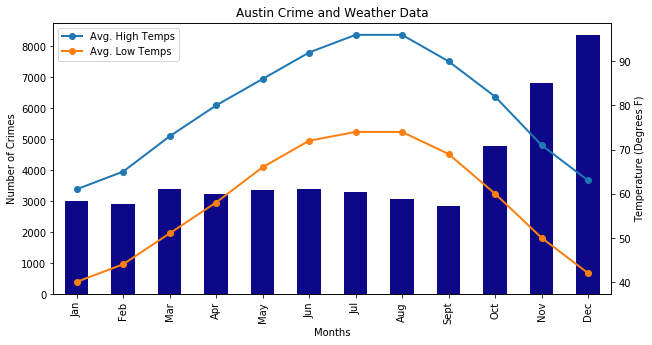

In [47]:
fig = plt.figure(figsize= (10, 5))
ax = m1_t['Number of Crimes'].plot(kind='bar', use_index=True, colormap="plasma")

plt.ylabel("Number of Crimes")
plt.xlabel("Months")
plt.title("Austin Crime and Weather Data")

ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),
         m1_t[['Highs','Lows']].values,
         linestyle='-',
         marker='o', linewidth=2.0)
ax.set_xticklabels(tuple(x_axis))
plt.legend(("Avg. High Temps", "Avg. Low Temps"), loc="upper left")
plt.ylabel("Temperature (Degrees F)")

# Save the figure
plt.savefig("Pictures/AustinCrime&Weather.png")
plt.show()

In [37]:
austin_2018.isna().sum()

Date            0
Latitude     1164
Longitude    1164
Month           0
dtype: int64

In [38]:
austin_clean = austin_2018.dropna(how='any')
austin_clean.head()

,Date,Latitude,Longitude,Month
0,2018-01-01,30.407848,-97.678228,1
1,2018-01-01,30.269227,-97.752997,1
2,2018-01-01,30.260003,-97.739408,1
3,2018-01-01,30.266252,-97.749883,1
4,2018-01-01,30.292445,-97.696473,1


In [39]:
# Store latitude and longitude in locations
locations = austin_clean[["Latitude", "Longitude"]]

# Fill NaN values and convert to float
rating = austin_clean["Month"].astype(float)

In [40]:
# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, dissipating=True, max_intensity=10, point_radius=10)


# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))